# Cataract Forecasting

## Import Libraries

In [ ]:
!pip install pandas statsmodels matplotlib

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Read Cataract Data

In [ ]:
def create_df():
  # Load the dataset from the CSV file
  data = pd.read_csv('dataset.csv')

  # Convert 'Year' column to datetime format
  data['Year'] = pd.to_datetime(data['Year'], format='%Y')

  # Set 'Year' as the index
  data.set_index('Year', inplace=True)

  return data


## Generate Forecast

In [ ]:
def create_forecast_data(data, state_name):

  # Split the data into training and testing sets
  train_data = data.iloc[:-1]
  test_data = data.iloc[-1:]

  # Fit a linear regression model
  X_train = train_data.index.year.values.reshape(-1, 1)
  y_train = train_data[state_name]
  model = LinearRegression()
  model.fit(X_train, y_train)

  # Additional years for forecasting
  additional_years = [2019, 2030, 2040, 2050]
  X_additional = pd.DataFrame(additional_years, columns=['Year'])
  X_additional['Year'] = pd.to_datetime(X_additional['Year'], format='%Y').dt.year  # Extract the year component
  forecast_additional = model.predict(X_additional.values.reshape(-1, 1))

  # Forecast using the linear regression model
  X_test = test_data.index.year.values.reshape(-1, 1)
  forecast_values = model.predict(X_test)

  # Create a DataFrame to hold all the forecasted values, including the additional years
  forecast_data = pd.DataFrame({
      'Year': list(test_data.index.year) + additional_years,
      state_name : list(forecast_values) + list(forecast_additional)
  })

  return forecast_data, forecast_additional

## Plot Forecast

In [ ]:
def create_plot(data, forecast_data, forecast_additional, state_name):

  test_data = data.iloc[-1:]
  additional_years = [2019, 2030, 2040, 2050]

  # Plot the actual and forecasted values
  plt.figure(figsize=(10, 6))
  plt.plot(data.index.year, data[state_name], label='Actual Data')
  plt.plot(test_data.index.year, test_data[state_name], 'bo', label='Test Data')
  plt.plot(forecast_data['Year'], forecast_data[state_name], 'r--', label='Forecast')
  plt.scatter(additional_years, forecast_additional, color='g', marker='o', label='Additional Forecasts')
  plt.xlabel('Year')
  plt.ylabel(state_name)
  plt.title(f'Time Series Forecast: {state_name}')
  plt.legend()
  plt.show()

In [ ]:
def cataract_prevalance_forecast(region):
  # Create a dataframe
  data = create_df()
  # Get forecast information
  forecast_data, forecast_additional = create_forecast_data(data, region)
  # Plot forecast
  create_plot(data, forecast_data, forecast_additional, region)

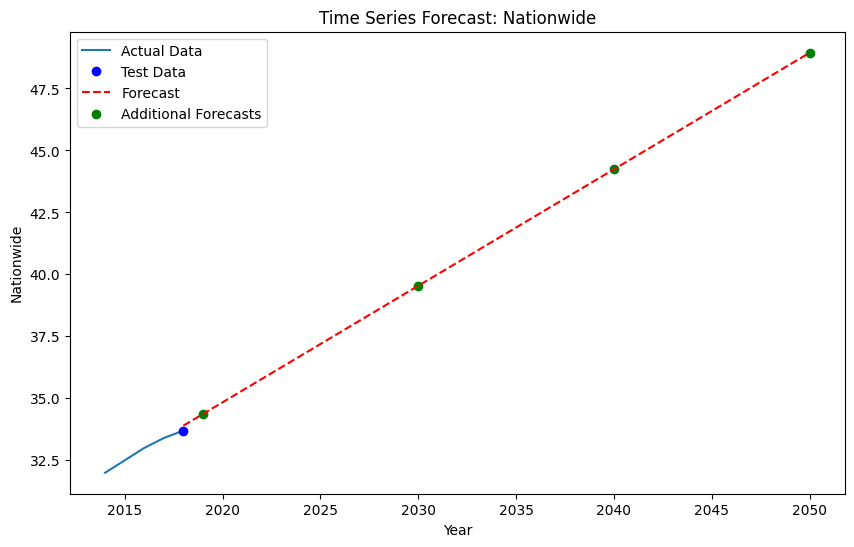

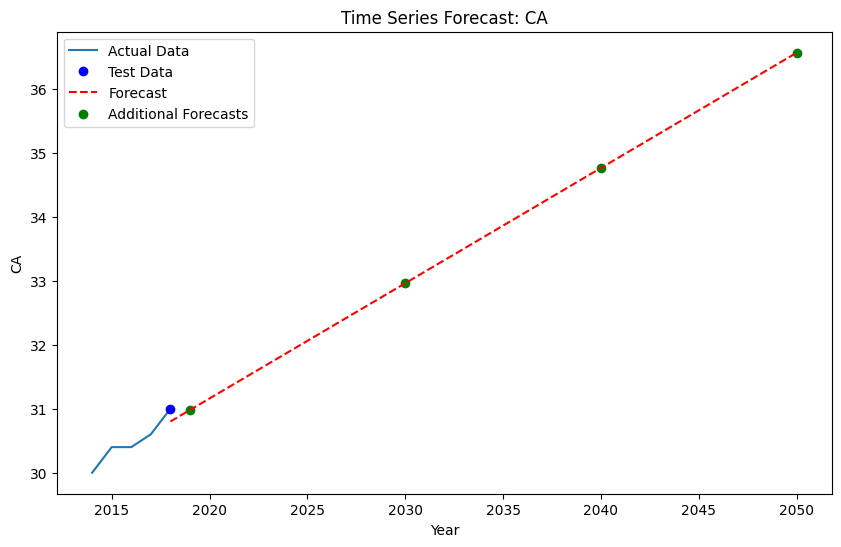

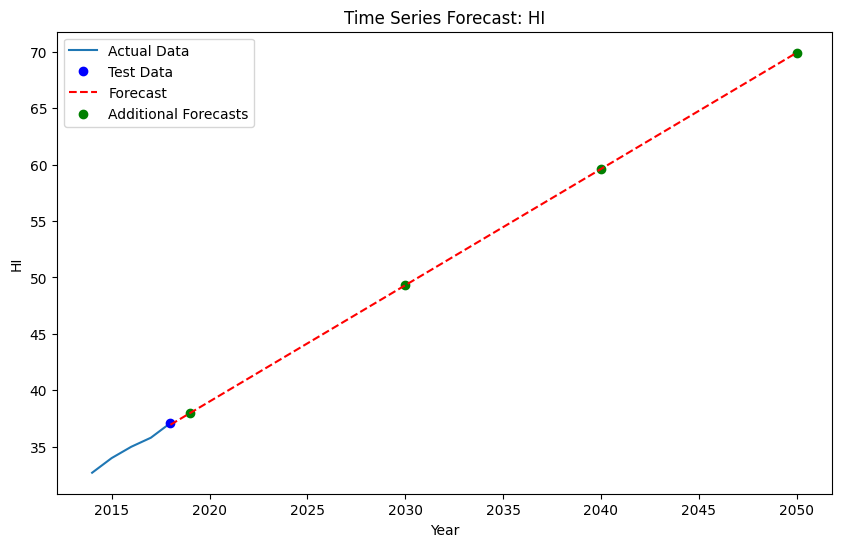

In [ ]:
regions = ['Nationwide', 'CA', 'HI']

for region in regions:
  cataract_prevalance_forecast(region)